## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
dataset_df=pd.merge(mouse_metadata,study_results, on="Mouse ID")
# Display Tumor Volume (mm3) with one decimal place
#dataset_df['Tumor Volume (mm3)']=dataset_df['Tumor Volume (mm3)'].map("{:,.1f}".format)

#dataset_df.round({'Tumor Volume (mm3)':1})
dataset_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summarystats=dataset_df[['Drug Regimen','Tumor Volume (mm3)']]
assignee_group=summarystats.groupby(['Drug Regimen'])
#Mean tumor vol
mean_tumor_vol=assignee_group['Tumor Volume (mm3)'].mean()
median_tumor_vol=assignee_group['Tumor Volume (mm3)'].median()
variance_tumor_vol=assignee_group['Tumor Volume (mm3)'].var()
stddev_tumor_vol=assignee_group['Tumor Volume (mm3)'].std()
stderr_tumor_vol=assignee_group['Tumor Volume (mm3)'].sem()

summarystats=pd.DataFrame({'Mean Tumor Volume':mean_tumor_vol,
                          'Median Tumor Volume':median_tumor_vol,
                          'Tumor Volume Variance':variance_tumor_vol,
                          'Tumor Volume Std. Dev.':stddev_tumor_vol,
                          'Tumor Volume Std. Err.':stderr_tumor_vol,})

summarystats.head(10)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

In [7]:
groupby_points=dataset_df.groupby(['Drug Regimen'])
count_data_points=groupby_points['Timepoint'].count()
datapoints_summary_table=pd.DataFrame(count_data_points)
datapoints_summary_table=datapoints_summary_table.sort_values(by=['Timepoint'], ascending=False)
datapoints_summary_table


,Timepoint
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


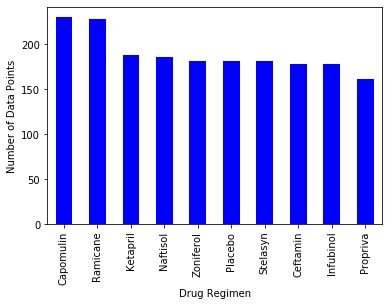

In [8]:
datapoints_summary_table.plot(kind='bar', facecolor='blue',legend=None)
plt.ylabel('Number of Data Points')
plt.xlabel('Drug Regimen')
plt.show()

In [9]:
drug_regime=dataset_df['Drug Regimen'].unique()
drug_regime

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

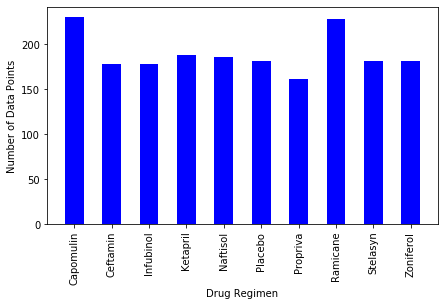

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.figure(figsize=(7,4))
plt.bar(count_data_points.index,count_data_points.values, color="blue", align="center", width=0.5)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.show()

## Pie plots

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group=dataset_df.groupby(['Sex'])
gender_count=gender_group['Mouse ID'].nunique()
st_df = pd.DataFrame(gender_count)
st_df['Percentage']=((gender_count/sum(gender_count))*100).round(2)
st_df.head()

,Mouse ID,Percentage
Sex,,
Female,124,49.8
Male,125,50.2


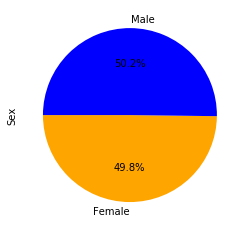

In [12]:
#plt.figure()
colors = ['orange','blue']
Sex_distribution_pie=st_df['Percentage'].plot(kind='pie', y=gender_group, autopct='%1.1F%%', colors=colors, startangle=180)
plt.ylabel('Sex')
plt.show()



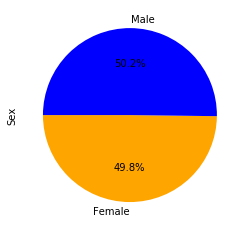

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=['Female','Male']
plt.pie(st_df['Percentage'], autopct='%1.1F%%', labels=labels, colors=colors,startangle=180)
plt.ylabel('Sex')
plt.show()

## Quartiles, outliers and boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Get the last timepoint for each mouse
max_tumor = dataset_df.groupby(["Mouse ID"]).max()
max_tumor = max_tumor.reset_index()
max_tumor.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1


In [15]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = max_tumor[['Mouse ID','Timepoint']].merge(dataset_df,on=['Mouse ID','Timepoint'],how="left")
merged_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [16]:
capomulin = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
capomulin.head(100)

19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
81     47.685963
84     37.311846
86     38.125164
88     38.753265
109    41.483008
116    38.846876
122    28.430964
125    33.329098
163    46.539206
164    32.377357
170    41.581521
175    23.343598
181    40.728578
184    34.455298
193    31.023923
205    40.658124
209    39.952347
221    36.041047
227    28.484033
240    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [17]:
# Quantitatively determine capomulin outliers
cap_quartiles = capomulin.quantile([.25,.5,.75])
cap_quartiles

0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64

In [18]:
# Determine individual variables for outlier calculation
cap_lowerq = cap_quartiles[0.25]
cap_medq = cap_quartiles[0.50]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

print(f'The lower quartile of occupancy is: {cap_lowerq.round(2)}')
print(f'The upper quartile of occupancy is: {cap_upperq.round(2)}')
print(f'The interquartile range of occupancy is: {cap_iqr.round(2)}')
print(f'The median of occupancy is: {cap_medq.round(2)}')
print(f'Values below {cap_lower_bound.round(3)} could be outliers.')
print(f'Values above {cap_upper_bound.round(3)} could be outliers.')

The lower quartile of occupancy is: 32.38
The upper quartile of occupancy is: 40.16
The interquartile range of occupancy is: 7.78
The median of occupancy is: 38.13
Values below 20.705 could be outliers.
Values above 51.832 could be outliers.


In [19]:
print(f"Capomulin potential outliers: {capomulin.loc[(capomulin < cap_lower_bound) | (capomulin > cap_upper_bound)]}")
print(f'- No potential outliers where found')

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
- No potential outliers where found


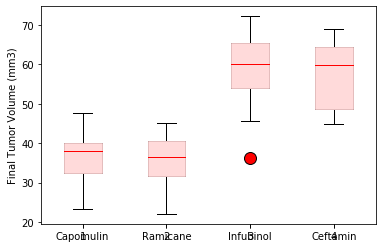

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#variables
Capomulin = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
Ramicane = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
Infubinol = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
Ceftamin = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']

#combine all regimens into a list
data_to_plot=[Capomulin, Ramicane, Infubinol, Ceftamin]

fig = plt.figure(1)
ax= fig.add_subplot(111)
bp = ax.boxplot(data_to_plot)

# add labels
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

# modify colors
bp=ax.boxplot(data_to_plot, patch_artist=True)

for flier in bp['fliers']:
    flier.set(marker='o', markerfacecolor='r', markersize=12)

for median in bp['medians']:
    median.set(color='r')
    
for box in bp['boxes']:
    box.set(color='#FFD3D3D3')
    
plt.show()

## Line and scatter plots

In [77]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Mouse_and_regimen=dataset_df.loc[(dataset_df['Mouse ID']=='m957') | (dataset_df['Drug Regimen']=='Capomulin')]
Mouse_and_regimen.head(75)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
140,m957,Capomulin,Female,3,19,25,37.695432,1
141,m957,Capomulin,Female,3,19,30,38.212479,1
142,m957,Capomulin,Female,3,19,35,32.562839,1
143,m957,Capomulin,Female,3,19,40,32.947615,1


In [61]:
group_assignee=dataset_df.groupby(['Mouse ID']).filter(lambda x: dataset_df['Drug Regimen']=='Capomulin')
group_assignee



TypeError: filter function returned a Series, but expected a scalar bool

In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [23]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen